In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("/kaggle/input/bank-customers/Churn Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
df = df.drop(columns=["RowNumber","CustomerId","Surname"])

In [96]:
df = pd.get_dummies(df,columns=["Gender","Geography"],drop_first=True,dtype=np.int32)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Male        10000 non-null  int32  
 10  Geography_Germany  10000 non-null  int32  
 11  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


In [98]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.545700,0.250900,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.433553,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [99]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [100]:
df.shape

(10000, 12)

/tmp/ipykernel_32/107776459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: ylabel='Density'>

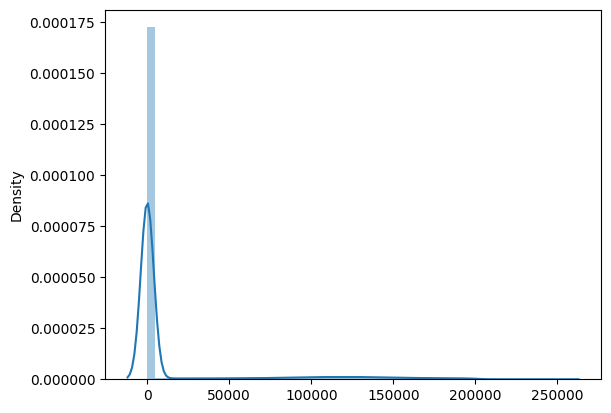

In [101]:
sns.distplot(df)

In [102]:
x = df.drop(columns="Exited")
y = df["Exited"]

In [103]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer,power_transform,MinMaxScaler,StandardScaler
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [104]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [105]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [106]:
model = Sequential()
model.add(Dense(30,activation="sigmoid",input_dim=11))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

In [107]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                360       
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
history = model.fit(x_train_sc,y_train,epochs=100,batch_size=10,validation_split=0.2)

Epoch 1/100
640/640 [==============================] - 2s 2ms/step - loss: 0.3336 - accuracy: 0.8631 - val_loss: 0.3376 - val_accuracy: 0.8587
Epoch 2/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8636 - val_loss: 0.3372 - val_accuracy: 0.8612
Epoch 3/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8642 - val_loss: 0.3361 - val_accuracy: 0.8619
Epoch 4/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8642 - val_loss: 0.3364 - val_accuracy: 0.8600
Epoch 5/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8642 - val_loss: 0.3360 - val_accuracy: 0.8625
Epoch 6/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8630 - val_loss: 0.3367 - val_accuracy: 0.8600
Epoch 7/100
640/640 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.8639 - val_loss: 0.3362 - val_accuracy: 0.8594

In [115]:
y_log = model.predict(x_test_sc)

63/63 [==============================] - 0s 1ms/step


In [116]:
y_pred = np.where(y_log>0.5,1,0)

In [117]:
accuracy_score(y_pred,y_test)

0.8625

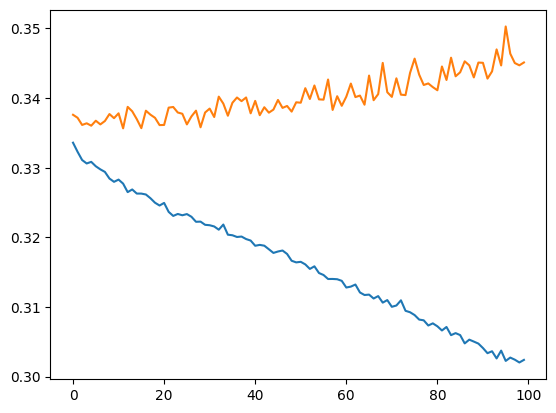

In [118]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

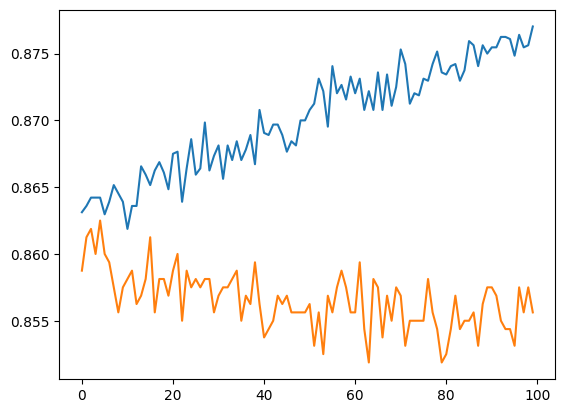

In [119]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])